# Title:

### Wassup:
We take the book, we code it on c++ and we interface with python and excel :)

In [1]:
import numpy as np
import cppQuantFi

In [2]:
cppQuantFi.say("hello")

'hello'

In [3]:
dir(cppQuantFi)

['Matrix',
 'VanillaOption',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'call_delta',
 'call_delta_fdm',
 'call_gamma',
 'call_gamma_fdm',
 'call_price',
 'call_rho',
 'call_rho_fdm',
 'call_theta',
 'call_theta_fdm',
 'call_vega',
 'call_vega_fdm',
 'monte_carlo_call_greeks',
 'monte_carlo_call_price',
 'monte_carlo_put_price',
 'put_delta',
 'put_delta_fdm',
 'put_gamma',
 'put_gamma_fdm',
 'put_price',
 'put_rho',
 'put_rho_fdm',
 'put_theta',
 'put_theta_fdm',
 'put_vega',
 'put_vega_fdm',
 'say']

# Vanilla Option

In [4]:
test = cppQuantFi.VanillaOption()

In [5]:
test.calc_call_price()

10.450577973198428

In [6]:
test.calc_put_price()

5.573520423269834

In [7]:
test.getK()

100.0

# Matrix class (I don't like this class in this book)

In [8]:
a = cppQuantFi.Matrix()
b = cppQuantFi.Matrix(1,4,1)

In [9]:
b.get_mat()

[[1.0, 1.0, 1.0, 1.0]]

In [10]:
a.get_mat()

[]

# Euro Option with BS & MC

In [11]:
num_sims = 10000000;
S = 100.;
K = 100.;
r = 0.05;
v = 0.2;
T = 1.0;

In [12]:
cppQuantFi.call_price(S,K,r,v,T)

10.450577973198428

In [13]:
cppQuantFi.put_price(S,K,r,v,T)

5.573520423269834

In [14]:
cppQuantFi.monte_carlo_call_price(num_sims,S,K,r,v,T)

10.455283600877703

In [15]:
cppQuantFi.monte_carlo_put_price(num_sims,S,K,r,v,T)

5.57388213819991

# Greeks

In [16]:
call_delta = cppQuantFi.call_delta(S,K,r,v,T)
call_gamma = cppQuantFi.call_gamma(S,K,r,v,T)
call_vega = cppQuantFi.call_vega(S,K,r,v,T)
call_theta = cppQuantFi.call_theta(S,K,r,v,T)
call_rho = cppQuantFi.call_rho(S,K,r,v,T)


In [17]:
call_delta, call_gamma, call_vega, call_theta, call_rho

(0.6368304370770013,
 0.018762025269650963,
 37.524050539301925,
 -6.414028340655278,
 53.2324657345017)

In [18]:
put_delta = cppQuantFi.put_delta(S,K,r,v,T)
put_gamma = cppQuantFi.put_gamma(S,K,r,v,T)
put_vega = cppQuantFi.put_vega(S,K,r,v,T)
put_theta = cppQuantFi.put_theta(S,K,r,v,T)
put_rho = cppQuantFi.put_rho(S,K,r,v,T)

In [19]:
put_delta, put_gamma, put_vega, put_theta, put_rho

(-0.36316956292299873,
 0.018762025269650963,
 37.524050539301925,
 -1.6578812181517075,
 -41.890476715569704)

In [20]:
delta = 0.0001

In [21]:
call_delta_fdm = cppQuantFi.call_delta_fdm(S,K,r,v,T,delta)
call_gamma_fdm = cppQuantFi.call_gamma_fdm(S,K,r,v,T,delta)
call_vega_fdm = cppQuantFi.call_vega_fdm(S,K,r,v,T,delta)
call_theta_fdm = cppQuantFi.call_theta_fdm(S,K,r,v,T,delta)
call_rho_fdm = cppQuantFi.call_rho_fdm(S,K,r,v,T,delta)

In [22]:
call_delta_fdm, call_gamma_fdm, call_vega_fdm, call_theta_fdm, call_rho_fdm

(0.6368365789910513,
 0.018763302023216966,
 37.52438182701212,
 6.413933344191491,
 53.2397053697764)

In [23]:
put_delta_fdm = cppQuantFi.put_delta_fdm(S,K,r,v,T,delta)
put_gamma_fdm = cppQuantFi.put_gamma_fdm(S,K,r,v,T,delta)
put_vega_fdm = cppQuantFi.put_vega_fdm(S,K,r,v,T,delta)
put_theta_fdm = cppQuantFi.put_theta_fdm(S,K,r,v,T,delta)
put_rho_fdm = cppQuantFi.put_rho_fdm(S,K,r,v,T,delta)

In [24]:
put_delta_fdm, put_gamma_fdm, put_vega_fdm, put_theta_fdm, put_rho_fdm

(-0.3631634210421453,
 37.52438182701212,
 37.52438182701212,
 1.6577981119780816,
 -41.878481091686126)

In [25]:
#call only here
Sp = 0.0
Sm = 0.0
Rp = 0.0
Vp = 0.0
Tp = 0.0
S_ = 0.0
delta_MC = gamma_MC = rho_MC = theta_MC = vega_MC = 0.0

# It does not work because float, int, bool ... are immutable in python cf. pybind doc. a class need to be created

This problem will be solved at the end of the book

In [26]:
cppQuantFi.monte_carlo_call_price(num_sims, S, K, r, v,T, delta, Sp,S_,Sm,Rp,Vp,Tp)

In [27]:
cppQuantFi.monte_carlo_call_greeks(delta,Sp, S_,Sm,Rp,Vp, Tp,delta_MC,gamma_MC, rho_MC, theta_MC, vega_MC)

In [28]:
delta_MC,gamma_MC,rho_MC,theta_MC,vega_MC

(0.0, 0.0, 0.0, 0.0, 0.0)

# Black Scholes with PDE plotting csv result

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
x, y, z = np.loadtxt('fdm.csv', unpack=True)

In [35]:
X = np.reshape(x, (20,20))
Y = np.reshape(y, (20,20))
Z = np.reshape(z, (20,20))

In [37]:
print(X. shape , Y. shape , Z. shape)

(20, 20) (20, 20) (20, 20)


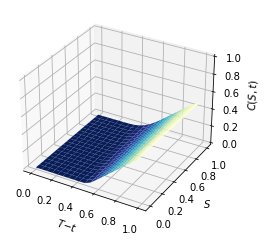

In [44]:
step = 0.04
maxval = 1.0
fig = plt.figure ()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1.0)
ax.set_ylabel(r'$S$')
ax.set_xlabel(r'$T−t$')
ax.set_zlabel(r'$C(S,t)$')
plt.show()